# Домашнее задание 4.1

# 🥨👨🏻‍🍳🥐🥖

Тест с картинками оказался в итоге успешным, и теперь мы хотим усилить визуальный контент. Есть идея, что если мы сделаем не одну картинку, а еще и добавим видео производства наших изделий, то пользователь будет принимать решение о покупке охотнее и быстрее, и конверсия в заказ вырастет. 

__Продакт вернул нам такой дизайн эксперимента:__

*1. `Бизнес-проблема:`* мы считаем, что конверсии из визита в покупку в нашем магазине недостаточно высоки. Мы посмотрели на страницы конкурентов и поняли, что у нас есть возможность увеличить объем продаж, если мы еще немного изменим дизайн страницы с каталогом продукции. 

*2. `Гипотеза:`* предполагается, что добавление видео с процессом приготовления вкусностей мотивирует к их покупке и позволяет добиться двух эффектов:
   * повышение конверсии из визита в оплату (больше людей захотят купить нашу продукцию)
   * как минимум, не снижение среднего чека покупки, а в идеале — увеличение
    
*3. `Ожидаемые действия пользователей:`* мы ожидаем, что, увидев видео с процессом приготовления вкусностей вместе с описанием продукции, больше людей захотят сделать покупку, а возможно — в среднем будут покупать больше продукции в одном заказе.

*4. `Эксперимент будет считаться успешным, если:`*
   * конверсия из визита в покупку с окном в 7 дней повысится
   * средний чек покупки не снизится


## Что нужно сделать?

Проанализировать данные нового теста и дать свои комментарии о его успешности. Можно ли выкатывать изменение на всех пользователей?

1. Выбрать окно конверсии
2. Исследовать распределение пользователей по группам по основным сегментам
3. Оценить статистическую значимость в изменении конверсии с помощью критерия хи-квадрат
4. Вычислить мощность теста
5. Использовать бутстрап для оценки влияния теста на средний чек
6. Сделать вывод по результатам проведенного теста 

## Задание 1. Выбери окно конверсии, используя исторические данные 

**1. Прочитай файл investigate_window.csv.**
   - Запиши даннные в переменную `historical_data`
    
   - Отправь безымянную колонку с нумерацией в индекс с помощью аргумента функции `read_csv()`.
   
   - Проверь, какой тип данных в каждой колонке, и переведи столбцы с датами в формат даты. 

In [1]:
import pandas as pd

In [2]:
historical_data = pd.read_csv('investigate_window.csv', index_col = 0, sep=',')
# historical_data = pd.read_csv('investigate_window.csv', parse_dates = [1, 2], index_col = 0) # - не сработало!!!

In [3]:
historical_data.head()

,user_id,main_page_viewed_at,order_completed_at,time_to_order
0,959238,2020-11-20 23:55:02.759000+00:00,2020-11-30 02:22:32.759000+00:00,9.102431
1,337366,2020-12-05 23:41:42.244000+00:00,2020-12-12 22:25:52.244000+00:00,6.947338
2,259956,2020-11-20 23:33:53.269000+00:00,2020-11-25 13:08:03.269000+00:00,4.565394
3,534280,2020-11-28 23:44:56.556000+00:00,2020-12-05 10:14:06.556000+00:00,6.436921
4,795121,2020-11-18 23:59:56.236000+00:00,2020-11-27 02:38:16.236000+00:00,8.109954


In [4]:
# Проверь, выводятся ли даты в формате datetime. Если нет — исправь это.

# format='%Y-%m-%d %H:%M:%S.%f' не срабтоало!!!
historical_data['main_page_viewed_at'] = pd.to_datetime(historical_data['main_page_viewed_at'], format='ISO8601') 
historical_data['order_completed_at'] = pd.to_datetime(historical_data['order_completed_at'], format='ISO8601') 

historical_data.dtypes

user_id                              int64
main_page_viewed_at    datetime64[ns, UTC]
order_completed_at     datetime64[ns, UTC]
time_to_order                      float64
dtype: object

**2. Вычисли 95, 90 и 85 перцентили для наших данных с помощью колонки time_to_order.**
   - Импортируй библиотеку `NumPy` и используй функцию перцентиля из нее.
   - Какой перцентиль соответствует недельному окну конверсии? 
   - Запиши это значение в отдельную переменную `perc_X`, где Х — это выбранный тобой процент, а значение переменной – значение перцентиля, т. е. количество дней, которое избирается в качестве окна конверсии. 
   - Округли значение до 1 знака после запятой.

In [5]:
import numpy as np

In [6]:
perc_95 = np.percentile(historical_data['time_to_order'], 95) # 95 перцентиль - значение для всей выборки
perc_95

7.117476851851854

In [7]:
perc_90 = np.percentile(historical_data['time_to_order'], 90) # 90 перцентиль - значение для всей выборки
perc_90

2.864949845679016

In [8]:
perc_85 = np.percentile(historical_data['time_to_order'], 85) # 85 перцентиль - значение для всей выборки
perc_85

1.9903886959876524

**3. Построй гистограмму распределения времени между первым заходом на сайт и покупкой.** 
   - Передай функции графика в аргумент данные о времени конверсии
   - Назови график и оси
   - Вертикальной пунктирной линией отметь значение выбранного тобой перцентиля. 
   - Выведи значение перцентиля в легенду. 
*Можешь использовать `seaborn` или `matplotlib`, как тебе удобнее.*

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt

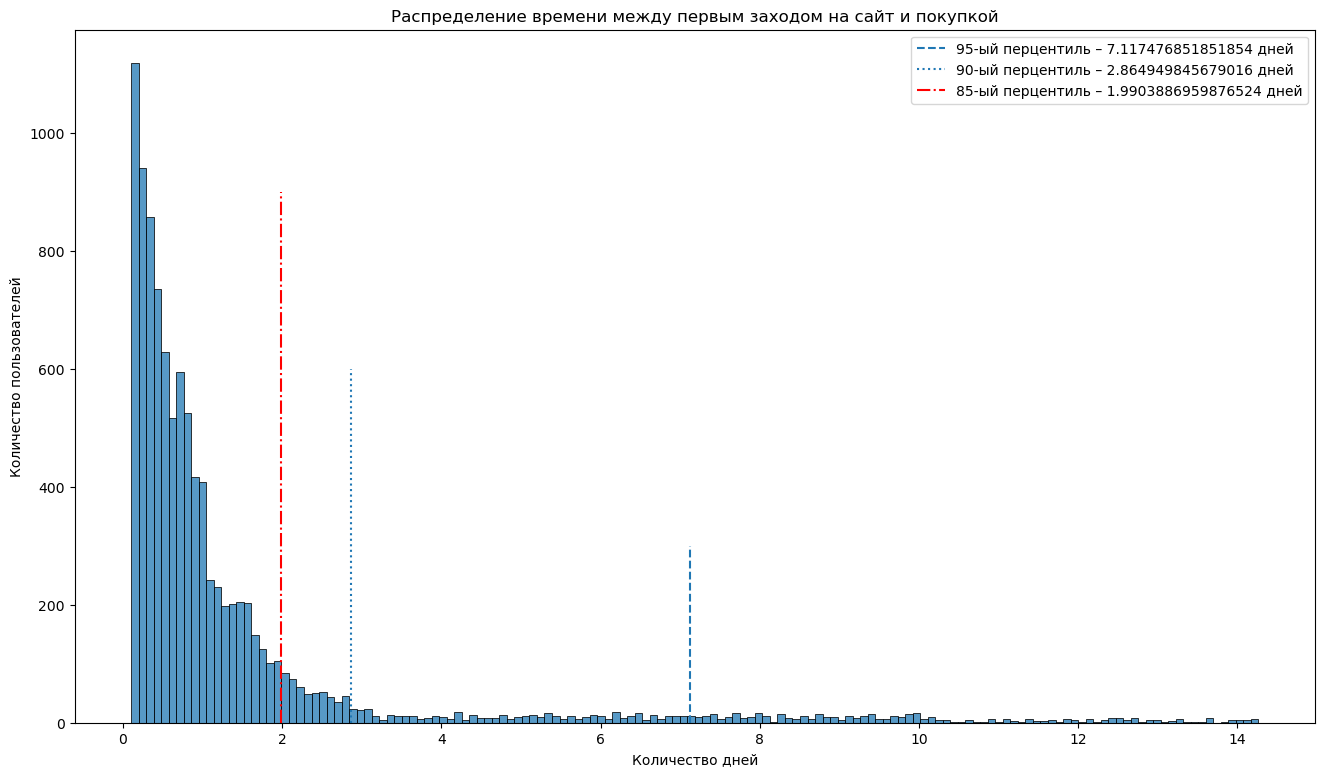

In [10]:
# напиши здесь код

plt.figure(figsize=(16,9))
sns.histplot(historical_data['time_to_order'])
plt.vlines(perc_95, ymin = 0, ymax = 300, linestyles = 'dashed', label = f'95-ый перцентиль – {perc_95} дней')
plt.vlines(perc_90, ymin = 0, ymax = 600, linestyles = 'dotted', label = f'90-ый перцентиль – {perc_90} дней')
plt.vlines(perc_85, ymin = 0, ymax = 900, colors='r', linestyles = 'dashdot', label = f'85-ый перцентиль – {perc_85} дней') # предпочтительный вариант
plt.title('Распределение времени между первым заходом на сайт и покупкой')
plt.xlabel('Количество дней')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

## Задание 2. Исследуй распределение пользователей по группам по основным сегментам 

**1. Прочитай файл bakery_ab_test.csv.**
   - Проверь, импортированы ли нужные тебе библиотеки.
   - Запиши данные в переменную `data`. 
   - Назначь индекс аналогично первому заданию.

In [11]:
# напиши здесь код

data = pd.read_csv('bakery_ab_test.csv', index_col = 0)
data

,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
1,3738,test,306.639511,regions,target_direct,1,pc
2,3755,control,NaN,regions,target_direct,0,pc
3,3772,test,NaN,regions,context_brand,0,mobile
4,3789,control,NaN,spb,target_direct,0,pc
5,3806,test,NaN,regions,social_media,0,pc
...,...,...,...,...,...,...,...
152995,2604636,test,NaN,regions,target_direct,0,pc
152996,2604653,control,5236.818309,regions,organic,1,mobile
152997,2604670,control,NaN,regions,target_direct,0,pc
152998,2604687,control,101.783032,regions,target_direct,1,pc


**2. Напиши функцию plot_segment_distribution, чтобы проверить распределение пользователей по сегментам внутри каждой группы.**
   - Аргументами функции должны быть данные теста, колонки с сегментами (маркетинг, гео и платформа), тест-фактор.
   - Для каждого сегмента в функции агрегируй данные, посчитав по для каждой группы и сегмента количество пользователей.
   - Сбрость индекс.
   - Добавь в функцию построение столбиковой диаграммы (bar chart).

In [12]:
# напиши здесь код
    
def plot_segments_distribution(df: pd.DataFrame,              # Исследуемый датафрейм
                               segment_columns: list | str,   # Сегменты
                               test_factor: str,              # Тест-фактор
                               distribution: str='user_id'):  # распределение
    for segment in segment_columns:
        aggregated_data = df.groupby(by = [test_factor, segment])[distribution].count().reset_index()
        sns.catplot(data = aggregated_data, x = segment, y = distribution, hue = test_factor, 
                    kind = "bar", height = 4, aspect = 1.5)

**3. Вызови функцию и посмотри на графики. Какой вывод о качестве сплитования ты можешь сделать?**
    — Передай списком столбцы, в которых обозначены сегменты пользователей, и отдельно столбец с тест-фактором.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


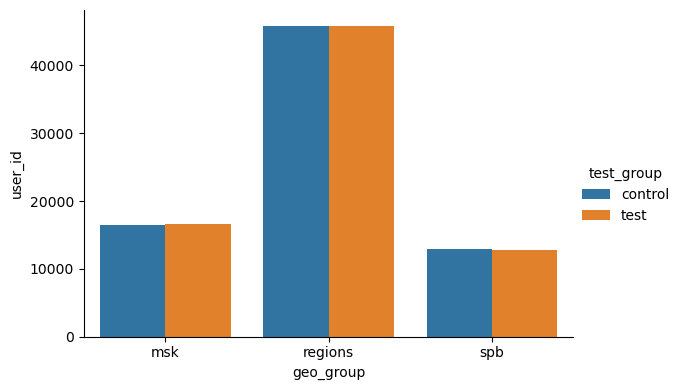

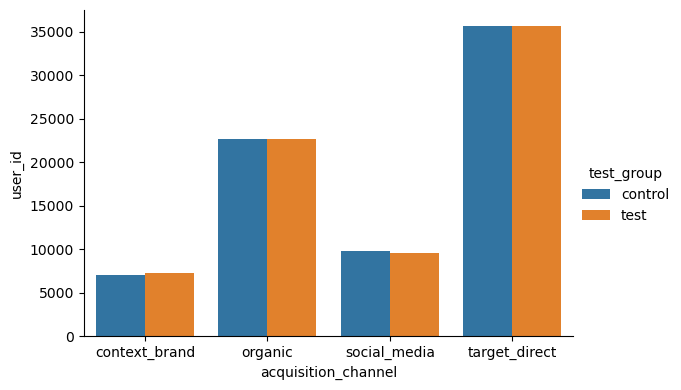

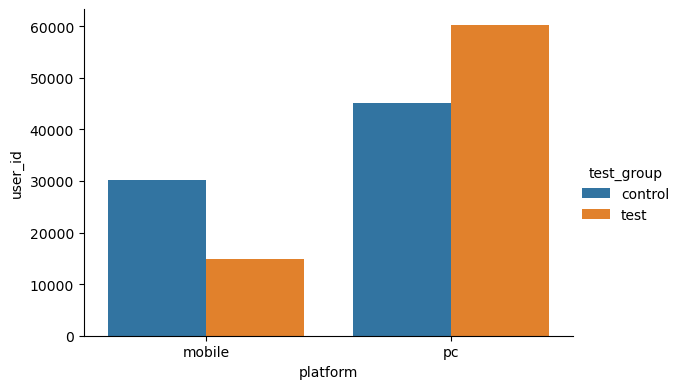

In [13]:
# напиши здесь код
plot_segments_distribution(data, ["geo_group", "acquisition_channel", "platform"], "test_group")

## Задание 3. Используй критерий Хи-квадрат для конверсии


В прошлом задании ты, скорее всего, столкнулся с неравномерным распределением пользователей. Раньше мы просто перезапускали тест, чтобы собрать данные, но сейчас тест уже завершен, так что нам нужно анализировать те данные, которые есть. Мы не можем исправить данные, но можем проанализировать общие результаты и сравнить их с результатами для пользователей, зашедших с разных платформ, чтобы уменьшить риск принятия ошибочного решения. Поэтому дальше мы будем анализировать параллельно 3 теста:

1. Все пользователи, попавшие в тест
2. Пользователи, заходившие с ПК `platform = 'pc'`
3. Пользователи, заходившие с мобильного `platform = 'mobile'`

**Создай для каждой из 3 групп теста отдельную таблицу с метриками**
   - общее количество пользователей 
   - количество покупок в окне конверсии
   - средняя сумма покупки 
   - конверсия (количество покупок в окне конверсии / общее количество пользователей или среднее по полю `within_window`)
    
*Для фильтрации нужных пользователей можешь использовать* `loc[ ]`


In [15]:
data.sample(3)

,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
68706,1171723,control,NaN,regions,organic,0,pc
81028,1381197,test,5416.225125,spb,target_direct,1,pc
59036,1007333,control,NaN,regions,target_direct,0,pc


In [16]:
metrics = data.groupby('test_group', as_index= False).agg(
    cnt_id = ('user_id', 'count'),               # общее количество пользователей
    cnt_amount = ('within_window', 'sum'),       # количество покупок в окне конверсии
    mean_amount =('purchase_amount', 'mean'))    # средняя сумма покупки

metrics['conversion'] = round(metrics['cnt_amount']/metrics['cnt_id']*100, 2)
metrics

,test_group,cnt_id,cnt_amount,mean_amount,conversion
0,control,75210,22998,5170.864335,30.58
1,test,75273,24427,5394.771589,32.45


In [17]:
metrics_pc = data[data['platform'] == 'pc'].groupby('test_group', as_index= False).agg(
    cnt_id = ('user_id', 'count'),               # общее количество пользователей
    cnt_amount = ('within_window', 'sum'),       # количество покупок в окне конверсии
    mean_amount =('purchase_amount', 'mean'))    # средняя сумма покупки

metrics_pc['conversion'] = round(metrics_pc['cnt_amount']/metrics_pc['cnt_id']*100, 2)
metrics_pc 

,test_group,cnt_id,cnt_amount,mean_amount,conversion
0,control,45112,13732,5200.121803,30.44
1,test,60317,19659,5401.003720,32.59


In [18]:
metrics_mobile = data[data['platform'] == 'mobile'].groupby('test_group', as_index= False).agg(
    cnt_id = ('user_id', 'count'),               # общее количество пользователей
    cnt_amount = ('within_window', 'sum'),       # количество покупок в окне конверсии
    mean_amount =('purchase_amount', 'mean'))    # средняя сумма покупки

metrics_mobile['conversion'] = round(metrics_mobile['cnt_amount']/metrics_mobile['cnt_id']*100, 2)
metrics_mobile

,test_group,cnt_id,cnt_amount,mean_amount,conversion
0,control,30098,9266,5127.505438,30.79
1,test,14956,4768,5369.075812,31.88


**1. Вычисли** `p-value` **для каждой группы с помощью теста хи-квадрат**

   - Импортируй библиотеку `statsmodels` и используй функцию `proportions_chisquare` из нее
   - Результат работы функции `proportions_chisquare` присвой трем переменным для каждой группы


In [19]:
import statsmodels.stats.proportion as proportion

In [24]:
chi2stat, pval, table = proportion.proportions_chisquare(metrics['cnt_amount'], metrics['cnt_id'])
chi2stat, pval

(61.137841436908104, 5.321539863368111e-15)

In [25]:
chi2stat_pc, pval_pc, table_pc = proportion.proportions_chisquare(metrics_pc['cnt_amount'], metrics_pc['cnt_id'])
chi2stat_pc, pval_pc

(55.28301795095328, 1.0436637877855105e-13)

In [26]:
chi2stat_mobile, pval_mobile, table_mobile = proportion.proportions_chisquare(metrics_mobile['cnt_amount'], metrics_mobile['cnt_id'])
chi2stat_mobile, pval_mobile

(5.576527147023639, 0.018202784051985058)

**2. Введи в анализ уровень значимости в 5% с помощью переменной** `alpha`.


In [28]:
# напиши здесь код

alpha = 0.05

print('Соответствие анализа уровень значимости в 5% для всей выборки', pval < alpha)
print('Соответствие анализа уровень значимости в 5% для заказов с PC', pval_pc < alpha)
print('Соответствие анализа уровень значимости в 5% для заказов с Телефона', pval_mobile < alpha)

Соответствие анализа уровень значимости в 5% для всей выборки True
Соответствие анализа уровень значимости в 5% для заказов с PC True
Соответствие анализа уровень значимости в 5% для заказов с Телефона True


**3. Оставь комментарий, какой вывод о наличии статистически значимой в каждой группе разницы можно сделать? Что делаем с нулевой гипотезой?**

## Задание 4. Вычисли мощность теста

1. Импортируй объект `stats.power` из библиотеки `statsmodels`
2. Присвой функцию `GofChisquarePower()` из этой библиотеки в переменную `chipower` 
3. Реализуй функцию для подсчета `effect_size`

In [29]:
import statsmodels.stats.power as smp

In [30]:
# напиши здесь код

chipower = smp.GofChisquarePower()

`effect_size` — это та самая наблюдаемая разница между двумя вариантами. Вычисляется следующим образом: 

$$ES = \sqrt{(p_0 - p_1)^2/p_o}$$

, где под $p_0$ можно понимать конверсию в контрольной группе, а $p_1$ — тестовой

In [31]:
def chi2_effect_size(p0, p1):
    return np.sqrt(((p0 - p1)**2 / p0))

4. Запиши значения конверсии в тестовой `conversion_test` и контрольной `conversion_control` группы в разные переменные
    - переведи серию в массив с помощью `.values[ ]`
    - раздели значения на 100, чтобы получить значения, а не %
    
    
5. Создай переменную nobs для количества наблюдений и запиши в нее значение меньшей группы

In [32]:
conversion_control = metrics['conversion'].values[0]/100 
conversion_test = metrics['conversion'].values[1]/100
nobs = min(metrics['cnt_id'])

In [33]:
conversion_control_mobile = metrics_mobile['conversion'].values[0]/100 
conversion_test_mobile = metrics_mobile['conversion'].values[1]/100
nobs_mobile = min(metrics_mobile['cnt_id'])

In [34]:
conversion_control_pc = metrics_pc['conversion'].values[0]/100 
conversion_test_pc = metrics_pc['conversion'].values[1]/100
nobs_pc = min(metrics_pc['cnt_id'])

**6. Вызови функцию .solve_power и передай ей в аргументы** 
    - effect_size
    - количество наблюдений меньшей группы
    - значение p-value
    - мощности присвой значение None
    
**7. Сделай анализ мощности для каждого сегмента, для которого делали тест хи-квадрат.**

Оставь комментарий, как ты оцениваешь мощность этого теста? Можно ли на основе таких показателей делать выводы?


In [35]:
power = chipower.solve_power(
    effect_size = chi2_effect_size(conversion_control, conversion_test), # разница коэффициентов конверсии
    nobs = nobs, # размер выборки
    alpha = pval, # значение ошибки первого рода на наших данных
    power = None) # функция вернет значение, указаное как None
power

0.927136791608663

In [36]:
mobile_power = chipower.solve_power(
    effect_size = chi2_effect_size(conversion_control_mobile, conversion_test_mobile), # разница коэффициентов конверсии
    nobs = nobs_mobile, # размер выборки
    alpha = pval_mobile, # значение ошибки первого рода на наших данных
    power = None) # функция вернет значение, указаное как None
mobile_power

0.51629109023244

In [37]:
pc_power = chipower.solve_power(
    effect_size = chi2_effect_size(conversion_control_pc, conversion_test_pc), # разница коэффициентов конверсии
    nobs = nobs_pc, # размер выборки
    alpha = pval_pc, # значение ошибки первого рода на наших данных
    power = None) # функция вернет значение, указаное как None
pc_power

0.7999771197445285

## Задание 5. Воспользуйся бутстрапом для оценки влияния теста на средний чек

**1. Сделай бутстрап среднего чека для тестовой и контрольной выборок, визуализируй результат. Какие выводы можно сделать?**
   - загрузи нужные модули из библиотеки `bootstrapped`
   - для сегментов, которые мы анализируем отдельно, создай переменную со значением среднего чека
   - чтобы убрать строки без покупок, используй `dropna()` и `.values`, чтобы перевести данные в формат массива

In [39]:
!pip install bootstrapped

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13972 sha256=a8147a5a9f18fa541ad4f67feab17f5aa01a7afca54efd5d9682a97c3db17fd4
  Stored in directory: c:\users\de47013\appdata\local\pip\cache\wheels\8b\47\d1\909397af2748ea916f6b72c346055e2426e7980bd1894b3633
Successfully built bootstrapped


In [40]:
# импортируем необходимые модули
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare
import numpy as np

In [41]:
data.sample(3)

,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
35441,606218,control,2245.678426,regions,target_direct,1,pc
135668,2310077,control,3361.068892,regions,target_direct,1,mobile
91598,1560887,control,NaN,regions,organic,0,mobile


In [44]:
test = data.loc[data['test_group'] == 'test', ['purchase_amount']].dropna().values
control = data.loc[data['test_group'] == 'control', ['purchase_amount']].dropna().values

test_pc = data.loc[(data['test_group'] == 'test') & (data['platform'] == 'pc'), ['purchase_amount']].dropna().values
control_pc = data.loc[(data['test_group'] == 'control') & (data['platform'] == 'pc'), ['purchase_amount']].dropna().values

test_mobile = data.loc[(data['test_group'] == 'test') & (data['platform'] == 'mobile'), ['purchase_amount']].dropna().values
control_mobile = data.loc[(data['test_group'] == 'control') & (data['platform'] == 'mobile'), ['purchase_amount']].dropna().values

**2. Вызови функцию `bootstrap_ab` для каждого сегмента, передай ей нужные аргументы**
   - `test = `
   - `ctrl = `
   - `stat_func = bs_stats.mean`
   - `compare_func = bs_compare.difference`
   - `return_distribution = True`

In [46]:
boot = bs.bootstrap_ab(
    test = test,
    ctrl = control, 
    stat_func = bs_stats.mean,
    compare_func = bs_compare.difference,
    return_distribution=True)
boot

array([263.3635559 , 170.07541405, 262.15697412, ..., 262.0993127 ,
       257.99678822, 245.09160213])

In [47]:
boot_pc = bs.bootstrap_ab(
    test = test_pc,
    ctrl = control_pc, 
    stat_func = bs_stats.mean,
    compare_func = bs_compare.difference,
    return_distribution=True)
boot_pc

array([240.7944155 , 202.08028253, 148.3653598 , ..., 196.045561  ,
       205.7976203 , 207.43965534])

In [49]:
boot_mobile = bs.bootstrap_ab(
    test = test_mobile,
    ctrl = control_mobile, 
    stat_func = bs_stats.mean,
    compare_func = bs_compare.difference,
    return_distribution=True)
boot_mobile

array([180.0943648 , 194.72665632, 231.52782256, ..., 270.56423345,
       168.2154763 , 335.75374904])

**3. Задай размер доверительного интервала для каждого исследуемого сегмента 95% с помощью перцентилей**

In [50]:
# Если я правильно понимаю то сегмент в 95% это за исключением 2.5% слева и 2.5 справа, т.е. от 2.5% по 97.5%
borders = np.percentile(boot, [2.5, 97.5])
borders_pc = np.percentile(boot_pc, [2.5, 97.5])
borders_mobile = np.percentile(boot_mobile, [2.5, 97.5])

**4. Оцени, есть ли статистически значимое изменение по среднему чеку в каждом сегменте**

   - Построй гистограмму распределения значений среднего чека.
   - Выведи границы доверительного интервала линиями.
   - Выведи ноль красной линией.
   - Оставь комментарий, есть ли статистически значимое изменение по среднему чеку в каждом сегменте.
   

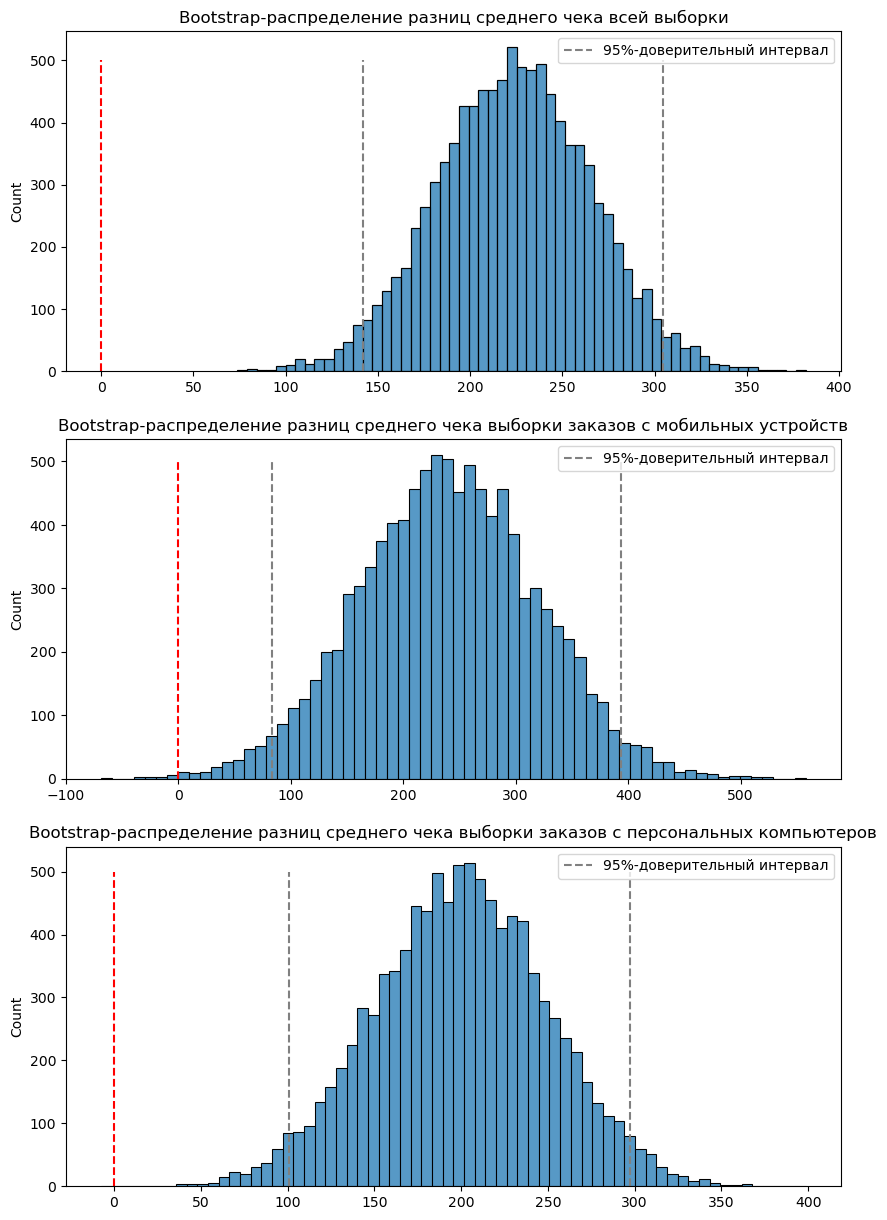

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.histplot(ax=ax1, data=boot)
ax1.set_title('Bootstrap-распределение разниц среднего чека всей выборки')
ax1.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 500, 
           linestyles= '--', 
           colors = 'red')
ax1.vlines(borders, # отрисуем перцентили
           ymin = 0, 
           ymax = 500, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
ax1.legend()

sns.histplot(ax=ax2, data=boot_mobile)
ax2.set_title('Bootstrap-распределение разниц среднего чека выборки заказов с мобильных устройств')
ax2.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 500, 
           linestyles= '--', 
           colors = 'red')
ax2.vlines(borders_mobile, # отрисуем перцентили
           ymin = 0, 
           ymax = 500, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
ax2.legend()

sns.histplot(ax=ax3, data=boot_pc)
ax3.set_title('Bootstrap-распределение разниц среднего чека выборки заказов с персональных компьютеров')
ax3.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 500, 
           linestyles= '--', 
           colors = 'red')
ax3.vlines(borders_pc, # отрисуем перцентили
           ymin = 0, 
           ymax = 500, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
ax3.legend()

plt.show()

## Задание 6. Сделай вывод по результатам проведенного теста (заданий 2–5)

Нужно ли внедрять изменение каталога? Почему?

<div
  style="
    padding: 24px;
    background-color: #009ee4;
    border-radius: 24px;
    color: white;
    font-family: Arial;
  "
>
  <div style="font-size: 36px; margin-top: 6px; line-height: 16px; font-weight: bold">
    Результат
  <div style=" font-size: 18px; margin-top: 24px; line-height: 24px">
    Статистически значимая разница наблюдается в среднем чеке на каждом графике, так как 0 входит далеко за доверительный интервал разницы между группами

      

</div>



# 🎉🎉🎉 Поздравляем, ты великолепен! 





*(Ой да перестань!)*